In [15]:
r = df.groupby('fruits')
type(r)

pandas.core.groupby.generic.DataFrameGroupBy

# filter()
- `DataFrameGroupBy.filter(func, dropna=True, *args, **kwargs)`
- 특정 **조건을 만족하는 Group의 데이터(행)들을 조회**할 때 사용한다. 주로 조건은 group별 집계결과를 이용한다.
    1. 함수에 group별 DataFrame을 argument로 전달한다.
    2. 함수는 받은 DataFrame을 이용해 집계한 값의 조건을 비교해서 반환한다.(반환타입: Bool) 
    3. **반환값이 True인 Group들의 모든 행들로 구성된 DataFrame을 반환한다!!**
- 매개변수
    - **func**: filtering 조건을 구현한 함수 객체
        - 첫번째 매개변수로 Group으로 묶인 DataFrame을 받는다.
        - bool type 값을 반환한다. 매개변수로 받은 DataFrame이 특정 조건을 만족하는지 여부를 반환한다.
    - **dropna=True**
        - 필터를 통과하지 못한 group의 DataFrame의 값들을 drop시킨다(기본값). False로 설정하면 NA 처리해서 반환한다.
    - **\*args, \*\*kwargs**: filter 함수의 두번째부터  선언된 매개변수에 전달할 argument 값들을 가변인자로 전달한다.

In [1]:
import numpy as np
import pandas as pd

# cnt1 값의 범위: 사과: 10대, 귤: 20대, 배: 단단위, 딸기 30이상
data = dict(fruits=['사과', '사과','사과', '사과','사과','귤','귤','귤','귤','귤','배','배','배','배','배','딸기','딸기','딸기','딸기','딸기']
            ,cnt1=[10, 12, 13, 11, 12, 21, 22, 27, 24, 26, 7, 7, 8, 3, 2, 30, 35, 37, 41, 28]
            ,cnt2=[100,  103, 107, 107,  101,  51,  57, 58,  57, 51,  9, 9,  5,  7,  7,  208, 217, 213, 206, 204]
           )
df = pd.DataFrame(data)
df

,fruits,cnt1,cnt2
0,사과,10,100
1,사과,12,103
2,사과,13,107
3,사과,11,107
4,사과,12,101
5,귤,21,51
6,귤,22,57
7,귤,27,58
8,귤,24,57
9,귤,26,51


In [10]:
result = df.groupby("fruits")['cnt1'].mean()
result2 = result[result >= 20]
result2.index

Index(['귤', '딸기'], dtype='object', name='fruits')

In [13]:
# cnt1 컬럼의 평균이 20 이상인  과일들 데이터
df[df['fruits'].isin(result2.index)]

,fruits,cnt1,cnt2
5,귤,21,51
6,귤,22,57
7,귤,27,58
8,귤,24,57
9,귤,26,51
15,딸기,30,208
16,딸기,35,217
17,딸기,37,213
18,딸기,41,206
19,딸기,28,204


In [23]:
# cnt1의 평균이 20이상인 값들
def check_mean(dataframe):
    return dataframe['cnt1'].mean() >= 20
    

In [30]:
# cnt1의 평균이 thresh 이상인 값들
def check_mean2(dataframe, thresh=20):
    return dataframe['cnt1'].mean() >= thresh

In [27]:
df.groupby('fruits').filter(check_mean)#, dropna=False)

,fruits,cnt1,cnt2
5,귤,21,51
6,귤,22,57
7,귤,27,58
8,귤,24,57
9,귤,26,51
15,딸기,30,208
16,딸기,35,217
17,딸기,37,213
18,딸기,41,206
19,딸기,28,204


In [34]:
df.groupby('fruits').filter(check_mean2, thresh=30)

,fruits,cnt1,cnt2
15,딸기,30,208
16,딸기,35,217
17,딸기,37,213
18,딸기,41,206
19,딸기,28,204


In [38]:
df.groupby('fruits').filter(lambda dataframe : dataframe['cnt1'].mean() >= 10)

,fruits,cnt1,cnt2
0,사과,10,100
1,사과,12,103
2,사과,13,107
3,사과,11,107
4,사과,12,101
5,귤,21,51
6,귤,22,57
7,귤,27,58
8,귤,24,57
9,귤,26,51


In [24]:
df.groupby('fruits').groups

{'귤': [5, 6, 7, 8, 9], '딸기': [15, 16, 17, 18, 19], '배': [10, 11, 12, 13, 14], '사과': [0, 1, 2, 3, 4]}

# transform
- `DataFrameGroupBy.transform(func, *args)`, `SeriesGroupBy.transform(func, *args)`
    - 함수(func)에 열(컬럼)의 값들을 group 별로 전달 한다. 함수는 그 값을 받아 통계량을 구해 반환한다. 반환된 통계량으로 원래 값들을 변경한 Series를 반환한다. 여러 컬럼에 대해 처리할 경우 DataFrame을 반환한다.
    - func: 함수객체
        - 매개변수
            - 그룹별 컬럼값들을 받을 변수 선언
        - return
            - 계산한 통계량.
        - DataFrameGroupBy은 모든 컬럼의 값들을 group 별 Series로 전달한다.
    - *args: 함수에 전달할 추가 인자값이 있으면 매개변수 순서에 맞게 값을 전달한다.
- transform() 함수를 groupby() 와 사용하면 컬럼의 각 원소들을 자신이 속한 그룹의 통계량으로 변환된 데이터셋을 생성할 수 있다.
- 컬럼의 값과 통계값을 비교해서 보거나 결측치 처리등에 사용할 수있다.

## 원본에 통계치 붙여서 비교하기

In [42]:
df.groupby('fruits')['cnt1'].mean()

fruits
귤     24.0
딸기    34.2
배      5.4
사과    11.6
Name: cnt1, dtype: float64

In [49]:
result = df.groupby('fruits')['cnt1'].transform("mean")
result

0     11.6
1     11.6
2     11.6
3     11.6
4     11.6
5     24.0
6     24.0
7     24.0
8     24.0
9     24.0
10     5.4
11     5.4
12     5.4
13     5.4
14     5.4
15    34.2
16    34.2
17    34.2
18    34.2
19    34.2
Name: cnt1, dtype: float64

In [51]:
df.insert(2, "cnt1_mean", result)

In [52]:
df

,fruits,cnt1,cnt1_mean,cnt2
0,사과,10,11.6,100
1,사과,12,11.6,103
2,사과,13,11.6,107
3,사과,11,11.6,107
4,사과,12,11.6,101
5,귤,21,24.0,51
6,귤,22,24.0,57
7,귤,27,24.0,58
8,귤,24,24.0,57
9,귤,26,24.0,51


In [53]:
df2 = pd.DataFrame(data)
df2

,fruits,cnt1,cnt2
0,사과,10,100
1,사과,12,103
2,사과,13,107
3,사과,11,107
4,사과,12,101
5,귤,21,51
6,귤,22,57
7,귤,27,58
8,귤,24,57
9,귤,26,51


In [55]:
result = df2.groupby("fruits").transform("mean") # series 별로 정보 표시
result

,cnt1,cnt2
0,11.6,103.6
1,11.6,103.6
2,11.6,103.6
3,11.6,103.6
4,11.6,103.6
5,24.0,54.8
6,24.0,54.8
7,24.0,54.8
8,24.0,54.8
9,24.0,54.8


In [56]:
df2.insert(2, "cnt1_mean", result['cnt1'])
df2['cnt2_mean'] = result['cnt2']

In [57]:
df2

,fruits,cnt1,cnt1_mean,cnt2,cnt2_mean
0,사과,10,11.6,100,103.6
1,사과,12,11.6,103,103.6
2,사과,13,11.6,107,103.6
3,사과,11,11.6,107,103.6
4,사과,12,11.6,101,103.6
5,귤,21,24.0,51,54.8
6,귤,22,24.0,57,54.8
7,귤,27,24.0,58,54.8
8,귤,24,24.0,57,54.8
9,귤,26,24.0,51,54.8


In [68]:
df3 = pd.DataFrame(data)
df3.sample(n=3) # df3에서 random하게 3개행을 추출

,fruits,cnt1,cnt2
17,딸기,37,213
4,사과,12,101
3,사과,11,107


In [74]:
df3.sample(frac=0.5)  # 비율 -> random하게 전체중 50% 행을 추출

,fruits,cnt1,cnt2
4,사과,12,101
12,배,8,5
14,배,2,7
2,사과,13,107
10,배,7,9
8,귤,24,57
11,배,7,9
17,딸기,37,213
1,사과,12,103
13,배,3,7


In [78]:
df3 = df3.sample(frac=1).reset_index(drop=True) #단순히 섞기만 하겠다.
df3

,fruits,cnt1,cnt2
0,딸기,41,206
1,귤,22,57
2,딸기,28,204
3,사과,13,107
4,사과,11,107
5,배,3,7
6,배,8,5
7,귤,26,51
8,사과,12,101
9,딸기,30,208


In [80]:
df3['cnt2_mean'] = df3.groupby('fruits')['cnt2'].transform("mean")
df3

,fruits,cnt1,cnt2,cnt2_mean
0,딸기,41,206,209.6
1,귤,22,57,54.8
2,딸기,28,204,209.6
3,사과,13,107,103.6
4,사과,11,107,103.6
5,배,3,7,7.4
6,배,8,5,7.4
7,귤,26,51,54.8
8,사과,12,101,103.6
9,딸기,30,208,209.6


In [84]:
df3.groupby('fruits')['cnt1'].transform(lambda series : series.max() - series.min())

0     13
1      6
2     13
3      3
4      3
5      6
6      6
7      6
8      3
9     13
10     6
11    13
12    13
13     3
14     6
15     6
16     3
17     6
18     6
19     6
Name: cnt1, dtype: int64

## 결측치 처리
- transform이용해서 결측치를 같은 과일별 평균값으로 변환
    - 전체 평균보다 좀더 정확할 수 있다.

In [87]:
s = pd.Series([10, np.nan, 20, np.nan])
s

0    10.0
1     NaN
2    20.0
3     NaN
dtype: float64

In [88]:
# 결측치를 특정 값을 채우기.
s.fillna(1000)

0      10.0
1    1000.0
2      20.0
3    1000.0
dtype: float64

In [90]:
s.fillna(s.mean())

0    10.0
1    15.0
2    20.0
3    15.0
dtype: float64

In [94]:
s.fillna(pd.Series([1,2,3,4]))  # s(대상) 시리즈와 동일한 크기의 1차원 Series나 Dictionary를 넣어준다.
# 대상 Series의 결측치를 같은 index name의 원소로 대체.

0    10.0
1     2.0
2    20.0
3     4.0
dtype: float64

In [95]:
s

0    10.0
1     NaN
2    20.0
3     NaN
dtype: float64

In [98]:
df4 = pd.DataFrame(data)
df4.loc[[0, 5, 10, 15], "cnt2"] = np.nan
df4

,fruits,cnt1,cnt2
0,사과,10,NaN
1,사과,12,103.0
2,사과,13,107.0
3,사과,11,107.0
4,사과,12,101.0
5,귤,21,NaN
6,귤,22,57.0
7,귤,27,58.0
8,귤,24,57.0
9,귤,26,51.0


In [101]:
result = df4.fillna(df4['cnt2'].mean())
result

,fruits,cnt1,cnt2
0,사과,10,94.3125
1,사과,12,103.0000
2,사과,13,107.0000
3,사과,11,107.0000
4,사과,12,101.0000
5,귤,21,94.3125
6,귤,22,57.0000
7,귤,27,58.0000
8,귤,24,57.0000
9,귤,26,51.0000


In [104]:
df4['cnt2']

0       NaN
1     103.0
2     107.0
3     107.0
4     101.0
5       NaN
6      57.0
7      58.0
8      57.0
9      51.0
10      NaN
11      9.0
12      5.0
13      7.0
14      7.0
15      NaN
16    217.0
17    213.0
18    206.0
19    204.0
Name: cnt2, dtype: float64

In [106]:
df4['cnt2'] = df4['cnt2'].fillna(df4.groupby("fruits")['cnt2'].transform("mean"))
df4

,fruits,cnt1,cnt2
0,사과,10,104.50
1,사과,12,103.00
2,사과,13,107.00
3,사과,11,107.00
4,사과,12,101.00
5,귤,21,55.75
6,귤,22,57.00
7,귤,27,58.00
8,귤,24,57.00
9,귤,26,51.00


<b style='font-size:2em'>TODO </b>

In [197]:
# 1.  data/diamonds.csv 조회
import pandas as pd
dia = pd.read_csv('data/diamonds.csv')
dia.shape

(53940, 10)

In [200]:
# 2.  cut 별 평균 가격이 4000 이상인 diamond 데이터들 조회 
result = dia.groupby('cut')['price'].mean()
result[result >= 4000]

cut
Fair       4358.757764
Premium    4584.257704
Name: price, dtype: float64

In [201]:
result_df = dia.groupby("cut").filter(lambda dataframe: dataframe['price'].mean() >= 4000)

In [203]:
result_df['cut'].value_counts()

cut
Premium    13791
Fair        1610
Name: count, dtype: int64

In [204]:
# 3. color 별 carat의 최대값과 최소값의 차이가 2이상 3미만인 모든 diamond 데이터들 조회
dia.groupby("color")['carat'].agg(["min", "max"])

,min,max
color,,
D,0.20,3.40
E,0.20,3.05
F,0.20,3.01
G,0.23,3.01
H,0.23,4.13
I,0.23,4.01
J,0.23,5.01


In [205]:
def max_min_check(dataframe):
    min_carat = dataframe['carat'].min()
    max_carat = dataframe['carat'].max()
    diff = max_carat - min_carat
    return diff >= 2 and diff < 3

In [206]:
result2 = dia.groupby("color").filter(max_min_check)
result2.shape

(30631, 10)

In [207]:
result2['color'].value_counts()

color
G    11292
E     9797
F     9542
Name: count, dtype: int64

In [208]:
# 확인
dia.groupby("color")['carat'].agg(lambda col : col.max() - col.min())

color
D    3.20
E    2.85
F    2.81
G    2.78
H    3.90
I    3.78
J    4.78
Name: carat, dtype: float64

In [213]:
# 4. clarity 별 평균 가격 컬럼을 DataFrame에 추가.
result = round(dia.groupby('clarity')['price'].transform("mean"), 2)

In [214]:
dia.insert(7, "clarity_price_mean", result)
dia.head()

,carat,cut,color,clarity,depth,table,price,clarity_price_mean,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,5063.03,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3996.00,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,3839.46,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,3924.99,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,5063.03,4.34,4.35,2.75


# pivot_table()
엑셀의 pivot table 기능을 제공하는 메소드.    
분류별 집계(Group으로 묶어 집계)를 처리하는 함수로 group으로 묶고자 하는 컬럼들을 행과 열로 위치시키고 집계값을 값으로 보여준다.    
역할은 `groupby()`를 이용한 집계와 같은데 **여러개 컬럼을 기준으로 groupby 를 할 경우 집계결과를 읽는 것이 더 편하다.(가독성이 좋다)**

> pivot() 함수와 역할이 다르다.   
> pivot() 은 index와 column의 형태를 바꾸는 reshape 함수.

- `DataFrame.pivot_table(values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')`
- **매개변수**
    - **index**
        - 문자열 또는 리스트. index로 올 컬럼들 => groupby였으면 묶었을 컬럼
    - **columns**
        - 문자열 또는 리스트. column으로 올 컬럼들 => groupby였으면 묶었을 컬럼 (index/columns가 묶여서 groupby에 묶을 컬럼들이 된다.)
    - **values**
        - 문자열 또는 리스트. 집계할 대상 컬럼들
    - **aggfunc**
        - 집계함수 지정. 함수, 함수이름문자열, 함수리스트(함수이름 문자열/함수객체), dict: 집계할 함수
        - 기본(생략시): 평균을 구한다. (mean이 기본값)
    - **fill_value, dropna**
        - fill_value: 집계시 NA가 나올경우 채울 값
        - dropna: boolean. 컬럼의 전체값이 NA인 경우 그 컬럼 제거(기본: True)
    - **margins/margins_name**
        - margin: boolean(기본: False). 총집계결과를 만들지 여부.
        - margin_name: margin의 이름 문자열로 지정 (생략시 All)

In [110]:
flights = pd.read_csv('data/flights.csv')
flights.shape

(58492, 14)

In [111]:
flights.groupby(["ORG_AIR", "DEST_AIR"])['DEP_DELAY'].mean()

ORG_AIR  DEST_AIR
ATL      ABE          9.612903
         ABQ          7.062500
         ABY         22.473684
         ACY          7.166667
         AEX         11.000000
                       ...    
SFO      SNA          8.483051
         STL         25.100000
         SUN         17.700000
         TUS         14.200000
         XNA         -3.000000
Name: DEP_DELAY, Length: 1130, dtype: float64

In [114]:
flights.ORG_AIR.nunique() * flights.DEST_AIR.nunique()

2710

## 두개의 컬럼을 grouping 해서 집계
- 항공사/출발공항코드 별 취소 총수 (1이 취소이므로 합계를 구한다.)
- 사용컬럼
    - grouping할 컬럼
        - AIRLINE: 항공사
        - ORG_AIR: 출발 공항코드
    - 집계대상컬럼
        - CANCELLED: 취소여부 - 1:취소, 0: 취소안됨
- 집계: sum

In [115]:
flights.groupby(["AIRLINE", "ORG_AIR"])["CANCELLED"].sum()

AIRLINE  ORG_AIR
AA       ATL         3
         DEN         4
         DFW        86
         IAH         3
         LAS         3
                    ..
WN       LAS         7
         LAX        32
         MSP         1
         PHX         6
         SFO        25
Name: CANCELLED, Length: 114, dtype: int64

In [116]:
flights.pivot_table(index="AIRLINE",   # group으로 묶을 컬럼중 행에 위치할 것
                    columns="ORG_AIR", # group으로 묶을 컬럼중 열에 위치할 것
                    values="CANCELLED",# 집계(통계량을 구할)할 컬럼 
                    aggfunc="sum"      # 집계함수
                   )

ORG_AIR,ATL,DEN,DFW,IAH,LAS,LAX,MSP,ORD,PHX,SFO
AIRLINE,,,,,,,,,,
AA,3.0,4.0,86.0,3.0,3.0,11.0,3.0,35.0,4.0,2.0
AS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B6,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,1.0
DL,28.0,1.0,0.0,0.0,1.0,1.0,4.0,0.0,1.0,2.0
EV,18.0,6.0,27.0,36.0,NaN,NaN,6.0,53.0,0.0,NaN
F9,0.0,2.0,1.0,0.0,1.0,1.0,1.0,4.0,0.0,0.0
HA,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0
MQ,5.0,NaN,62.0,0.0,NaN,0.0,0.0,85.0,NaN,NaN
NK,1.0,1.0,6.0,0.0,1.0,1.0,3.0,10.0,2.0,NaN


In [122]:
flights.pivot_table(index="AIRLINE",   # group으로 묶을 컬럼중 행에 위치할 것
                    columns="ORG_AIR", # group으로 묶을 컬럼중 열에 위치할 것
                    values="CANCELLED",# 집계(통계량을 구할)할 컬럼 
                    aggfunc="sum",      # 집계함수
                    margins=True,  #총계를 넣을지 여부(default: False)
                    margins_name="총계", 
                    fill_value= 0 # 결측치를 대신할 값. (결측치는 그 그룹으로 묶인 행이 없는 경우.)
                   )

ORG_AIR,ATL,DEN,DFW,IAH,LAS,LAX,MSP,ORD,PHX,SFO,총계
AIRLINE,,,,,,,,,,,
AA,3,4,86,3,3,11,3,35,4,2,154
AS,0,0,0,0,0,0,0,0,0,0,0
B6,0,0,0,0,0,0,0,0,0,1,1
DL,28,1,0,0,1,1,4,0,1,2,38
EV,18,6,27,36,0,0,6,53,0,0,146
F9,0,2,1,0,1,1,1,4,0,0,10
HA,0,0,0,0,0,0,0,0,0,0,0
MQ,5,0,62,0,0,0,0,85,0,0,152
NK,1,1,6,0,1,1,3,10,2,0,25


## 3개 이상의 컬럼을 grouping해서 집계
- 항공사/월/출발공항코드 별 취소 총수 
- grouping할 컬럼
    - AIRLINE:항공사
    - MONTH:월
    - ORG_AIR: 출발지 공항
- 집계 대상컬럼
    - CANCELLED: 취소여부
- 집계 : sum    

In [123]:
flights.pivot_table(index="MONTH", columns=["AIRLINE", 'ORG_AIR'],
                    values="CANCELLED", 
                    aggfunc="sum")

AIRLINE   AA                                                ...   VX        
ORG_AIR  ATL  DEN   DFW  IAH  LAS  LAX  MSP  ORD  PHX  SFO  ...  LAX  ORD   
MONTH                                                       ...             
1        0.0  0.0   8.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  \
2        2.0  1.0  33.0  1.0  2.0  3.0  0.0  7.0  1.0  1.0  ...  2.0  0.0   
3        1.0  0.0  13.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  0.0  NaN   
4        0.0  0.0   4.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  ...  1.0  0.0   
5        0.0  2.0   8.0  1.0  0.0  0.0  0.0  2.0  0.0  0.0  ...  0.0  0.0   
6        0.0  0.0   7.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  ...  0.0  0.0   
7        0.0  0.0   1.0  0.0  1.0  0.0  1.0  3.0  2.0  1.0  ...  0.0  0.0   
8        0.0  0.0   2.0  1.0  0.0  2.0  0.0  3.0  1.0  0.0  ...  0.0  0.0   
9        0.0  0.0   1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
11       0.0  0.0   3.0  0.0  0.0  1.0  1.0  6.0  0.0  0.0  ...  0.0  0.0   
12       0.0  1.0   6.0  0.0  0.0  2.0  1.0  4.0  0.0  0.0  ...  0.0  0.0   

AIRLINE        WN                                
ORG_AIR  SFO  ATL  DEN  LAS  LAX  MSP  PHX  SFO  
MONTH                                            
1        1.0  3.0  0.0  1.0  3.0  1.0  0.0  4.0  
2        1.0  3.0  3.0  1.0  2.0  0.0  2.0  5.0  
3        0.0  1.0  0.0  1.0  3.0  0.0  1.0  0.0  
4        0.0  0.0  4.0  0.0  2.0  0.0  1.0  2.0  
5        0.0  0.0  1.0  0.0  1.0  0.0  0.0  2.0  
6        0.0  1.0  1.0  0.0  0.0  0.0  0.0  6.0  
7        1.0  0.0  0.0  1.0  9.0  0.0  1.0  0.0  
8        0.0  0.0  0.0  1.0  4.0  0.0  0.0  2.0  
9        0.0  0.0  0.0  0.0  3.0  0.0  0.0  2.0  
11       0.0  1.0  3.0  1.0  3.0  0.0  1.0  2.0  
12       0.0  0.0  1.0  1.0  2.0  0.0  0.0  0.0  

[11 rows x 114 columns]

## 3개 이상의 컬럼을 grouping해서 집계 2
- 항공사/월/출발공항코드 별 최대/최소 연착시간
- grouping할 컬럼
    - AIRLINE:항공사
    - MONTH:월
    - ORG_AIR: 출발지 공항
- 집계 대상컬럼
    - ARR_DELAY: 연착시간
- 집계 : min, max    

In [128]:
result = flights.pivot_table(index=['AIRLINE', 'ORG_AIR'], columns="MONTH", 
                             values="ARR_DELAY", 
                             aggfunc=['min', 'max'])
result.to_excel("result.xlsx")

# apply() - Series, DataFrame의 데이터 일괄 처리

데이터프레임의 행들과 열들 또는 Series의 원소들에 공통된 처리를 할 때 apply 함수를 이용하면 반복문을 사용하지 않고 일괄 처리가 가능하다.

# **Series는 원소 하나하나, DataFrame은 Series가 매개변수로 들어간다!!**
 
- DataFrame.apply(함수, axis=0, args=(), \*\*kwarg)
    - 인수로 행이나 열을 받는 함수를 apply 메서드의 인수로 넣으면 데이터프레임의 행이나 열들을 하나씩 함수에 전달한다.
    - 매개변수
        - **함수**: DataFrame의 행들 또는 열들을 전달할 함수
        - **axis**: **0-컬럼(열)을 전달, 1-행을 전달 (기본값 0)**
        - **args**: 함수에 행/열 이외에 전달할 매개변수를 위치기반(순서대로) 튜플로 전달
        - **\*\*kwarg**: 함수에 행/열 이외에 전달할 매개변수를 키워드 인자로 전달
- Series.apply(함수, args=(), \*\*kwarg)
    - 인수로 Series의 원소들을 받는 함수를 apply 메소드의 인수로 넣으면  Series의 원소들을 하나씩 함수로 전달한다.
    - 매개변수
        - **함수**: Series의 원소들을 전달할 함수
        - **args**: 함수에 원소 이외에 전달할 매개변수를 위치기반(순서대로) 튜플로 전달
        - **\*\*kwarg**: 함수에 원소 이외에 전달할 매개변수를 키워드 인자로 전달

In [134]:
num = 7
list("월화수목금토일")[num-1]

'일'

In [140]:
def change_wd(num):
    return list("월화수목금토일")[num-1]+"요일"
#     if num == 1:
#         return "월"
#     elif num == 2:
#         return "화"
change_wd(4)

'목요일'

In [143]:
flights.columns

Index(['MONTH', 'DAY', 'WEEKDAY', 'AIRLINE', 'ORG_AIR', 'DEST_AIR',
       'SCHED_DEP', 'DEP_DELAY', 'AIR_TIME', 'DIST', 'SCHED_ARR', 'ARR_DELAY',
       'DIVERTED', 'CANCELLED'],
      dtype='object')

In [144]:
# 1: 월  ~ 7: 일
result = flights["WEEKDAY"].apply(change_wd)
result

0        목요일
1        목요일
2        목요일
3        목요일
4        목요일
        ... 
58487    목요일
58488    목요일
58489    목요일
58490    목요일
58491    목요일
Name: WEEKDAY, Length: 58492, dtype: object

In [145]:
flights2 = flights.copy()
flights2.insert(3, "WEEKDAY2", result)

In [149]:
flights2.iloc[150:200]

,MONTH,DAY,WEEKDAY,WEEKDAY2,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
150,1,2,5,금요일,US,LAS,PHX,635,-4.0,44.0,255,846,-15.0,0,0
151,1,2,5,금요일,OO,IAH,ASE,1835,39.0,120.0,913,2027,8.0,0,0
152,1,2,5,금요일,DL,ATL,MCO,655,1.0,59.0,404,822,-7.0,0,0
153,1,2,5,금요일,US,ATL,CLT,1959,0.0,41.0,226,2113,-11.0,0,0
154,1,2,5,금요일,DL,MSP,TPA,1315,90.0,170.0,1306,1721,92.0,0,0
155,1,2,5,금요일,DL,DFW,ATL,700,-3.0,95.0,731,1005,-5.0,0,0
156,1,2,5,금요일,WN,PHX,LAX,1255,14.0,57.0,370,1320,-1.0,0,0
157,1,2,5,금요일,OO,MSP,DIK,1955,-5.0,75.0,481,2103,-16.0,0,0
158,1,2,5,금요일,DL,ATL,BHM,1646,9.0,36.0,134,1640,13.0,0,0
159,1,2,5,금요일,DL,MSP,ATL,630,-3.0,116.0,907,1006,-20.0,0,0


In [150]:
flights2.insert(4, 
                "WEEKDAY3", 
                flights2['WEEKDAY'].apply(lambda x : list("월화수목금토일")[x-1]))

In [156]:
def func(column:pd.Series):
    if column.dtype == "object":
        return column.mode()[0]
    else:
        return column.mean()

In [153]:
flights2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58492 entries, 0 to 58491
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      58492 non-null  int64  
 1   DAY        58492 non-null  int64  
 2   WEEKDAY    58492 non-null  int64  
 3   WEEKDAY2   58492 non-null  object 
 4   WEEKDAY3   58492 non-null  object 
 5   AIRLINE    58492 non-null  object 
 6   ORG_AIR    58492 non-null  object 
 7   DEST_AIR   58492 non-null  object 
 8   SCHED_DEP  58492 non-null  int64  
 9   DEP_DELAY  57659 non-null  float64
 10  AIR_TIME   57474 non-null  float64
 11  DIST       58492 non-null  int64  
 12  SCHED_ARR  58492 non-null  int64  
 13  ARR_DELAY  57474 non-null  float64
 14  DIVERTED   58492 non-null  int64  
 15  CANCELLED  58492 non-null  int64  
dtypes: float64(3), int64(8), object(5)
memory usage: 7.1+ MB


In [157]:
flights2.apply(func)

MONTH           6.220646
DAY            15.702096
WEEKDAY         3.926862
WEEKDAY2             월요일
WEEKDAY3               월
AIRLINE               DL
ORG_AIR              ATL
DEST_AIR             LAX
SCHED_DEP    1387.984836
DEP_DELAY      10.921192
AIR_TIME      115.928576
DIST          872.900072
SCHED_ARR    1549.399832
ARR_DELAY       5.812315
DIVERTED        0.002342
CANCELLED       0.015062
dtype: object

# cut()/qcut() - 연속형(실수)을 범주형으로 변환
- cut() : 지정한 값을 기준으로 구간을 나눠 그룹으로 묶는다.
    - `pd.cut(x, bins,right=True, labels=None)`
    - 매개변수
        - **x**: 범주형으로 바꿀 대상. 1차원 배열형태(Series, 리스트, ndarray)의 자료구조
        - **bins**: 범주로 나눌때의 기준값(구간경계)들을 리스트로 묶어서 전달한다.
        - **right**: 구간경계의 오른쪽(True-기본)을 포함할지 왼쪽(False)을 포함할지
        - **labels**: 각 구간(범주)의 label을 리스트로 전달
            - 생략하면 범위를 범주명으로 사용한다. (ex: (10, 20], ()-포함안함, []-포함)
- qcut() :  대상배열의 최대값 ~ 최소값을 지정한 개수의 동등한 size(**원소의개수**)가 되도록 나눈다.
    - `pd.qcut(x, q, labels)`
    - 매개변수
        - **x**: 나눌 대상. 1차원 배열형태의 자료구조
        - **q**: 나눌 개수
        - **labels**: 각 구간(범주)의 label을 리스트로 전달

In [164]:
import numpy as np
np.random.seed(0)
age = np.random.randint(1, 100, 30) # 1 ~ 99 정수 난수 30개 생성
tall = np.round(np.random.normal(170, 10, 30), 2)
# 평균: 170, 표준편차: 10인 정규분포를 따르는 난수 30개 ===> 소숫점 두번째 이하에서 반올림.

In [165]:
df = pd.DataFrame({
    "나이":age, "키":tall
})
df

,나이,키
0,45,168.18
1,48,184.10
2,65,166.26
3,68,172.75
4,68,160.39
5,10,173.77
6,84,170.33
7,22,176.81
8,37,154.37
9,88,164.33


In [166]:
df.나이.value_counts()

나이
89    3
68    2
10    2
88    2
45    1
47    1
70    1
81    1
21    1
73    1
78    1
26    1
38    1
82    1
59    1
40    1
66    1
48    1
13    1
71    1
37    1
22    1
84    1
65    1
80    1
Name: count, dtype: int64

In [167]:
df.키.value_counts()

키
168.18    1
184.10    1
179.96    1
162.24    1
166.14    1
176.40    1
159.14    1
165.37    1
171.75    1
164.30    1
187.87    1
183.95    1
159.22    1
171.49    1
175.66    1
185.35    1
184.63    1
170.47    1
166.67    1
185.14    1
167.58    1
164.33    1
154.37    1
176.81    1
170.33    1
173.77    1
160.39    1
172.75    1
166.26    1
150.67    1
Name: count, dtype: int64

In [168]:
result = pd.cut(df.나이, 
                bins=3,   #최소 ~ 최대 ==> 3등분
               )

In [169]:
result
# ( ): 불포함 ===> opened
# [ ]: 포함  ===> closed
#  (62.667, 89.0]   : 62.667 < x <= 89.0

0     (36.333, 62.667]
1     (36.333, 62.667]
2       (62.667, 89.0]
3       (62.667, 89.0]
4       (62.667, 89.0]
5      (9.921, 36.333]
6       (62.667, 89.0]
7      (9.921, 36.333]
8     (36.333, 62.667]
9       (62.667, 89.0]
10      (62.667, 89.0]
11      (62.667, 89.0]
12      (62.667, 89.0]
13     (9.921, 36.333]
14    (36.333, 62.667]
15      (62.667, 89.0]
16    (36.333, 62.667]
17      (62.667, 89.0]
18    (36.333, 62.667]
19      (62.667, 89.0]
20      (62.667, 89.0]
21    (36.333, 62.667]
22     (9.921, 36.333]
23      (62.667, 89.0]
24      (62.667, 89.0]
25     (9.921, 36.333]
26     (9.921, 36.333]
27      (62.667, 89.0]
28      (62.667, 89.0]
29      (62.667, 89.0]
Name: 나이, dtype: category
Categories (3, interval[float64, right]): [(9.921, 36.333] < (36.333, 62.667] < (62.667, 89.0]]

In [170]:
result.value_counts()

나이
(62.667, 89.0]      17
(36.333, 62.667]     7
(9.921, 36.333]      6
Name: count, dtype: int64

In [171]:
result2 = pd.cut(df['나이'], bins=3, right=False)
result2.value_counts()

나이
[62.667, 89.079)    17
[36.333, 62.667)     7
[10.0, 36.333)       6
Name: count, dtype: int64

In [173]:
result3 = pd.cut(df['나이'], bins=3, right=False, 
                 labels=["나이대1", "나이대2", "나이대3"])
result3.value_counts()

나이
나이대3    17
나이대2     7
나이대1     6
Name: count, dtype: int64

In [178]:
lst = [0, 20, 40, 60, 100]
# 0 ~ 20, 20 ~ 40, 40 ~ 60, 60 ~ 100
result4 = pd.cut(df['나이'], 
                 bins=lst, 
                 labels=["청소년", "청년", "장년", "노년"]
                )

In [179]:
result4.value_counts()

나이
노년     17
청년      6
장년      4
청소년     3
Name: count, dtype: int64

In [181]:
df['나이대'] = result4
df

,나이,키,나이대
0,45,168.18,장년
1,48,184.10,장년
2,65,166.26,노년
3,68,172.75,노년
4,68,160.39,노년
5,10,173.77,청소년
6,84,170.33,노년
7,22,176.81,청년
8,37,154.37,청년
9,88,164.33,노년


In [184]:
df.groupby("나이대")['키'].mean()

나이대
청소년    173.546667
청년     168.171667
장년     174.032500
노년     170.558235
Name: 키, dtype: float64

<Axes: xlabel='나이대'>

C:\Users\Playdata\anaconda3\envs\ml\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 52397 (\N{HANGUL SYLLABLE CEONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\Playdata\anaconda3\envs\ml\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  func(*args, **kwargs)
C:\Users\Playdata\anaconda3\envs\ml\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  func(*args, **kwargs)
C:\Users\Playdata\anaconda3\envs\ml\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  func(*args, **kwargs)
C:\Users\Playdata\anaconda3\envs\ml\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from current font.
  func(*args, **kwargs)
C:\Users\Playdata\anaconda3\envs\ml\lib\site-packages\IPython\core\events.py:89: U

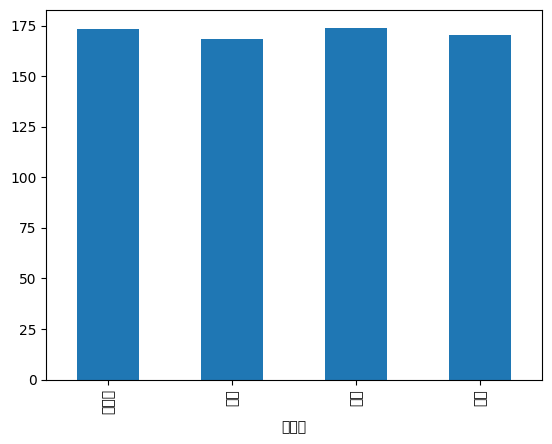

In [185]:
df.groupby("나이대")['키'].mean().plot(kind='bar')

In [189]:
# qcut

result = pd.qcut(df['나이'], q=2)
result.value_counts()

나이
(9.999, 67.0]    15
(67.0, 89.0]     15
Name: count, dtype: int64

In [194]:
result = pd.qcut(df['나이'], q=4, labels=["A", "B", "C", "D"])
result.value_counts()

나이
A    8
D    8
B    7
C    7
Name: count, dtype: int64

<b style='font-size:2em'>TODO </b>

In [196]:
# 1: data/diamonds.csv 를 읽어 DataFrame으로 만든다.
import pandas as pd
dia = pd.read_csv('data/diamonds.csv')
dia.shape

(53940, 10)

In [219]:
# 2: price 컬럼을 '고가', '중가', '저가' 세개의 범주값을 가지는
#    "price_cate" 컬럼을 생성한다.
price_cate1 = pd.cut(dia['price'], bins=3, labels=["저가", "중가", "고가"])
price_cate1.value_counts()

price
저가    43591
중가     7347
고가     3002
Name: count, dtype: int64

In [220]:
dia['price'].agg(["min", "max"])

min      326
max    18823
Name: price, dtype: int64

In [221]:
lst = [0, 1000, 15000, 20000]
price_cate2 = pd.cut(dia['price'], bins=lst, labels=['저가', '중가', '고가'])
price_cate2.value_counts()

price
중가    37761
저가    14524
고가     1655
Name: count, dtype: int64

In [222]:
price_cate3 = pd.qcut(dia['price'], q=3, labels=['저가', '중가', '고가'])
price_cate3.value_counts()

price
저가    17996
고가    17980
중가    17964
Name: count, dtype: int64

In [223]:
# 가격대 컬럼 추가.
dia['price_cate'] = price_cate2
dia.head()

,carat,cut,color,clarity,depth,table,price,clarity_price_mean,x,y,z,price_cate
0,0.23,Ideal,E,SI2,61.5,55.0,326,5063.03,3.95,3.98,2.43,저가
1,0.21,Premium,E,SI1,59.8,61.0,326,3996.00,3.89,3.84,2.31,저가
2,0.23,Good,E,VS1,56.9,65.0,327,3839.46,4.05,4.07,2.31,저가
3,0.29,Premium,I,VS2,62.4,58.0,334,3924.99,4.20,4.23,2.63,저가
4,0.31,Good,J,SI2,63.3,58.0,335,5063.03,4.34,4.35,2.75,저가


In [224]:
# 3 가격대(price_cate) 별 carat의 평균을 조회
dia.groupby('price_cate')['carat'].mean()

price_cate
저가    0.334937
중가    0.924311
고가    1.977861
Name: carat, dtype: float64

In [225]:
# 4 가격대(price_cate)와 cut별 평균 가격(price)를 피봇테이블로 조회
dia.groupby(['price_cate', 'cut'])['price'].mean()

price_cate  cut      
저가          Fair           776.720721
            Good           644.526079
            Ideal          733.002773
            Premium        734.418851
            Very Good      650.268946
중가          Fair          4284.918381
            Good          4473.090587
            Ideal         4274.762792
            Premium       5101.957400
            Very Good     4704.125399
고가          Fair         16682.268293
            Good         16778.441860
            Ideal        16803.335217
            Premium      16778.272572
            Very Good    16778.234332
Name: price, dtype: float64

In [227]:
dia.pivot_table(index="cut", columns="price_cate", values='price', aggfunc="mean", 
               margins=True)

price_cate,저가,중가,고가,All
cut,,,,
Fair,776.720721,4284.918381,16682.268293,4358.757764
Good,644.526079,4473.090587,16778.441860,3928.864452
Ideal,733.002773,4274.762792,16803.335217,3457.541970
Premium,734.418851,5101.957400,16778.272572,4584.257704
Very Good,650.268946,4704.125399,16778.234332,3981.759891
All,708.384880,4609.761765,16783.940181,3932.799722


In [229]:
# 5 cut, color, price_cate 별 carat의 평균을 피봇테이블로 조회
dia.pivot_table(index=["color", "cut"], columns="price_cate", 
                values="carat", 
                aggfunc="mean")

price_cate             저가        중가        고가
color cut                                    
D     Fair       0.323750  0.902282  2.158333
      Good       0.346954  0.864916  1.609286
      Ideal      0.329595  0.673123  1.519032
      Premium    0.340778  0.836930  1.653846
      Very Good  0.326674  0.833682  1.533333
E     Fair       0.367600  0.904031  1.833333
      Good       0.341950  0.861141  1.854706
      Ideal      0.330601  0.698273  1.607568
      Premium    0.337371  0.823480  1.785909
      Very Good  0.312074  0.826945  1.895526
F     Fair       0.446341  0.946250  2.022857
      Good       0.342216  0.869299  1.955625
      Ideal      0.327210  0.773352  1.696818
      Premium    0.347560  0.913477  1.831475
      Very Good  0.316548  0.865321  1.785500
G     Fair       0.476522  1.048566  2.126000
      Good       0.336722  0.953657  1.979524
      Ideal      0.331738  0.835667  1.795794
      Premium    0.343551  0.962658  1.897778
      Very Good  0.333591  0.909084  1.858594
H     Fair       0.406000  1.196713  2.392222
      Good       0.333576  1.043353  2.160833
      Ideal      0.331641  0.964646  2.070323
      Premium    0.334517  1.144073  2.120579
      Very Good  0.329159  1.048544  2.085694
I     Fair       0.460000  1.163742  2.524286
      Good       0.355333  1.159818  2.125938
      Ideal      0.349279  1.066984  2.147103
      Premium    0.339331  1.249468  2.180227
      Very Good  0.346179  1.101887  2.135604
J     Fair       0.412500  1.292973  3.607500
      Good       0.383208  1.227470  2.322000
      Ideal      0.381436  1.181488  2.323878
      Premium    0.356636  1.360523  2.398431
      Very Good  0.378557  1.236011  2.359167